In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,71378.6832,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,135195.3360,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
#Final dataset check

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Columns: 338 entries, Inches to OpSys_macOS
dtypes: bool(334), float64(3), int64(1)
memory usage: 465.3 KB


In [201]:
#=======================================
#POLYNOMIAL REGRESSION (Gradient Descent)
#=======================================

In [ ]:
#Data prepare

In [203]:
ram = df_original["Ram"].str.replace("GB","").astype(int).values
inches = df_original["Inches"].values
price = df_original["Price"].values

In [204]:
#Normalize X only

In [205]:
ram = (ram - ram.mean())/ram.std()
inches = (inches - inches.mean())/inches.std()

y = price

In [206]:
#Polynomial features

In [207]:
ram2 = ram**2
inches2 = inches**2
interaction = ram*inches

X = np.column_stack((ram, inches, ram2, inches2, interaction))

# add bias
X = np.c_[np.ones(len(X)), X]

In [208]:
#Initialize

In [209]:
theta = np.zeros(X.shape[1])

lr = 0.001
epochs = 5000
n = len(y)

cost_list_poly = []

In [210]:
#Gradient Descent

In [211]:
for i in range(epochs):

    y_pred = X @ theta

    cost = (1/n)*np.sum((y - y_pred)**2)
    cost_list_poly.append(cost)

    gradient = (-2/n)*(X.T @ (y - y_pred))
    theta -= lr*gradient

    if i % 500 == 0:
        print(f"Epoch {i}, Cost {cost}")

Epoch 0, Cost 4970413607.7034
Epoch 500, Cost 1309729157.1831913
Epoch 1000, Cost 867364756.0453541
Epoch 1500, Cost 702555175.0970027
Epoch 2000, Cost 631957797.1925209
Epoch 2500, Cost 599626221.7993494
Epoch 3000, Cost 584349397.7200794
Epoch 3500, Cost 577017959.4304211
Epoch 4000, Cost 573469058.430515
Epoch 4500, Cost 571742003.3874196


In [212]:
#R² polynomial

In [213]:
y_pred_poly = X @ theta

ss_res = np.sum((y - y_pred_poly)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2_poly = 1 - ss_res/ss_tot
print("Polynomial R2:", r2_poly)

Polynomial R2: 0.5880937531264843


In [214]:
#Cost vs iteration graph

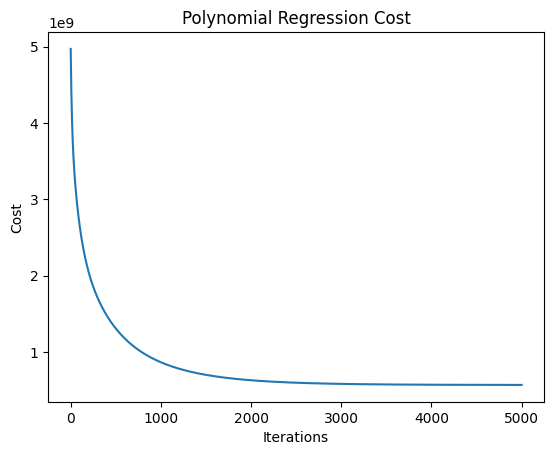

In [215]:
plt.plot(cost_list_poly)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Polynomial Regression Cost")
plt.show()

In [216]:
#Linear model (for comparison)

In [217]:
X_lin = np.column_stack((ram, inches))
X_lin = np.c_[np.ones(len(X_lin)), X_lin]

theta_lin = np.zeros(X_lin.shape[1])

for i in range(5000):
    y_pred = X_lin @ theta_lin
    gradient = (-2/n)*(X_lin.T @ (y - y_pred))
    theta_lin -= 0.001*gradient

y_pred_lin = X_lin @ theta_lin

ss_res = np.sum((y - y_pred_lin)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2_lin = 1 - ss_res/ss_tot
print("Linear R2:", r2_lin)

Linear R2: 0.5645693677983006


In [218]:
#Compare

In [219]:
print("Linear R2:", r2_lin)
print("Polynomial R2:", r2_poly)

Linear R2: 0.5645693677983006
Polynomial R2: 0.5880937531264843


In [220]:
#POLYNOMIAL REGRESSION FROM SCRATCH

In [221]:
#Data

In [222]:
ram = df_original["Ram"].str.replace("GB","").astype(int).values
weight = df_original["Weight"].str.replace("kg","").astype(float).values
inches = df_original["Inches"].values
y = df_original["Price"].values

In [223]:
#Normalize X only

In [224]:
ram = (ram - ram.mean())/ram.std()
weight = (weight - weight.mean())/weight.std()
inches = (inches - inches.mean())/inches.std()

In [225]:
#Initialize parameters

In [226]:
b0=b1=b2=b3=b4=b5=b6=b7=b8=b9 = 0

lr = 0.001
epochs = 6000
n = len(y)

cost_list = []

In [227]:
#Gradient Descent (full scratch)

In [228]:
for i in range(epochs):

    y_pred = (b0
              + b1*ram
              + b2*weight
              + b3*inches
              + b4*(ram**2)
              + b5*(weight**2)
              + b6*(inches**2)
              + b7*(ram*weight)
              + b8*(ram*inches)
              + b9*(weight*inches))

    cost = (1/n)*np.sum((y - y_pred)**2)
    cost_list.append(cost)

    db0 = (-2/n)*np.sum(y - y_pred)
    db1 = (-2/n)*np.sum(ram*(y - y_pred))
    db2 = (-2/n)*np.sum(weight*(y - y_pred))
    db3 = (-2/n)*np.sum(inches*(y - y_pred))
    db4 = (-2/n)*np.sum((ram**2)*(y - y_pred))
    db5 = (-2/n)*np.sum((weight**2)*(y - y_pred))
    db6 = (-2/n)*np.sum((inches**2)*(y - y_pred))
    db7 = (-2/n)*np.sum((ram*weight)*(y - y_pred))
    db8 = (-2/n)*np.sum((ram*inches)*(y - y_pred))
    db9 = (-2/n)*np.sum((weight*inches)*(y - y_pred))

    b0 -= lr*db0
    b1 -= lr*db1
    b2 -= lr*db2
    b3 -= lr*db3
    b4 -= lr*db4
    b5 -= lr*db5
    b6 -= lr*db6
    b7 -= lr*db7
    b8 -= lr*db8
    b9 -= lr*db9

    if i % 500 == 0:
        print(f"Epoch {i}, Cost {cost}")

Epoch 0, Cost 4970413607.7034
Epoch 500, Cost 1188512940.7258081
Epoch 1000, Cost 809343843.7459872
Epoch 1500, Cost 654445858.2023424
Epoch 2000, Cost 584135139.4904038
Epoch 2500, Cost 551333203.9272028
Epoch 3000, Cost 535842653.45519286
Epoch 3500, Cost 528457949.27319634
Epoch 4000, Cost 524900387.04850423
Epoch 4500, Cost 523161958.109461
Epoch 5000, Cost 522294376.76339215
Epoch 5500, Cost 521847574.03163606


In [229]:
#Final R2

In [230]:
y_pred = (b0
          + b1*ram
          + b2*weight
          + b3*inches
          + b4*(ram**2)
          + b5*(weight**2)
          + b6*(inches**2)
          + b7*(ram*weight)
          + b8*(ram*inches)
          + b9*(weight*inches))

ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2_poly = 1 - ss_res/ss_tot
print("Polynomial R2:", r2_poly)

Polynomial R2: 0.6236579777603288


In [231]:
#Cost Graph

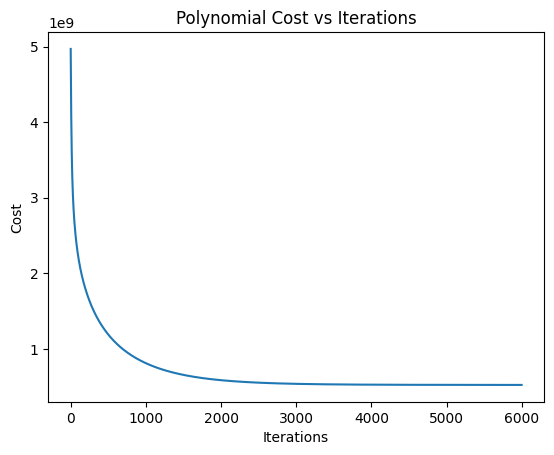

In [232]:
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Polynomial Cost vs Iterations")
plt.show()

In [233]:
#Polynomial prediction vs actual

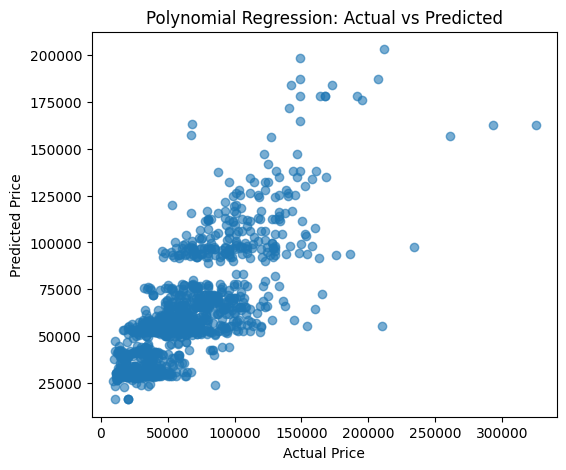

In [234]:
plt.figure(figsize=(6,5))
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

In [235]:
#Linear vs Polynomial compare

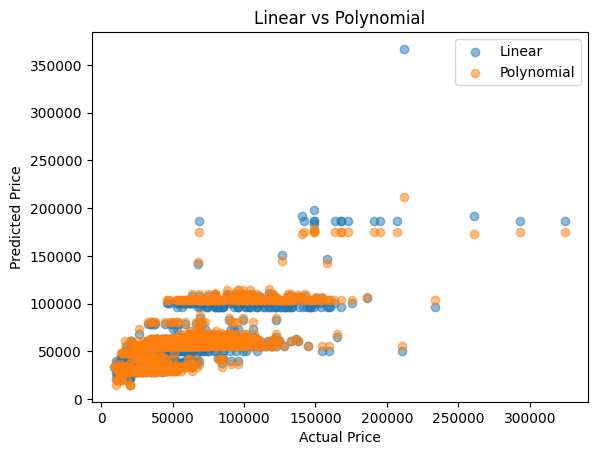

In [236]:
plt.scatter(y, y_pred_lin, label="Linear", alpha=0.5)
plt.scatter(y, y_pred_poly, label="Polynomial", alpha=0.5)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.title("Linear vs Polynomial")
plt.show()

In [237]:
#Cost vs iteration

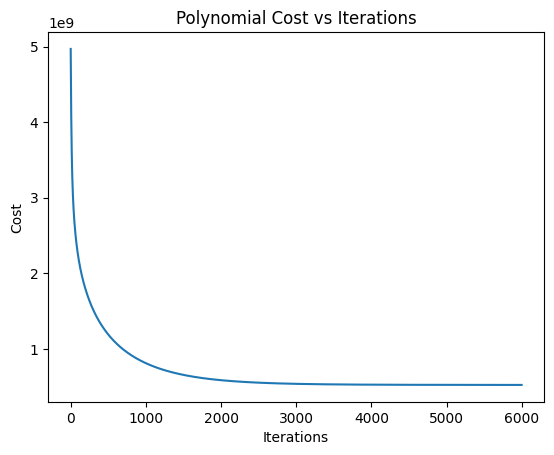

In [238]:
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Polynomial Cost vs Iterations")
plt.show()